In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dt=pd.read_csv("C:/Users/Sowmya Ganesh/Documents/delivery_time.csv")
dt.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#Creating copoy of actual data
delivery_data=dt.copy()
print(delivery_data)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


#### Basic Information Check

In [4]:
print(delivery_data.shape)

(21, 2)


In [5]:
print(delivery_data.dtypes)

Delivery Time    float64
Sorting Time       int64
dtype: object


In [6]:
print(delivery_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [7]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Exploratory Data Analysis(EDA)

#### To find the correlation between Delivery and Sorting Time

In [8]:
delivery_data[['Delivery Time','Sorting Time']].corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


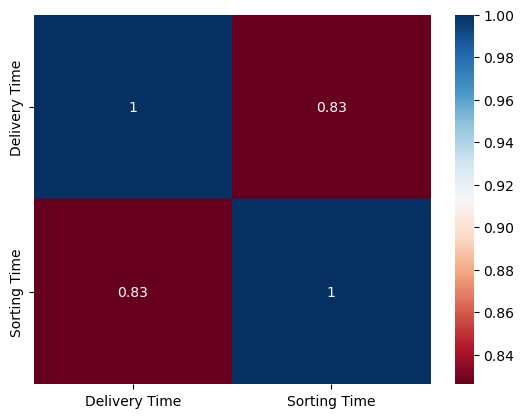

In [9]:
sns.heatmap(delivery_data[['Delivery Time','Sorting Time']].corr(),annot=True,cmap="RdBu",cbar=True)
plt.savefig("Delivery_corr.png",dpi=100)

In [10]:
#From the heat map we can infer there is 
# a strong relation between the columns delivery and sorting.

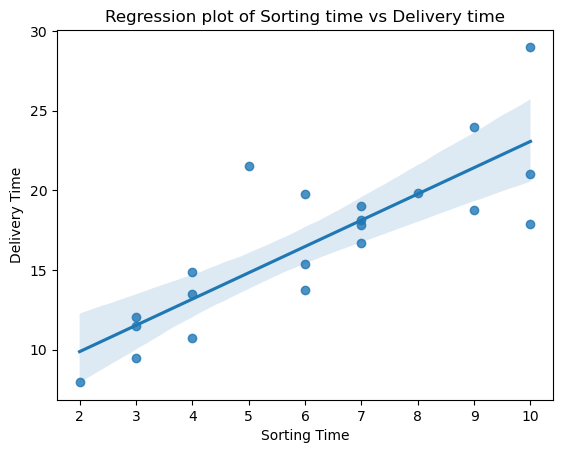

In [11]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=delivery_data)
plt.title('Regression plot of Sorting time vs Delivery time')
plt.savefig("Delivery_Regression.png")

<Axes: xlabel='Delivery Time', ylabel='Count'>

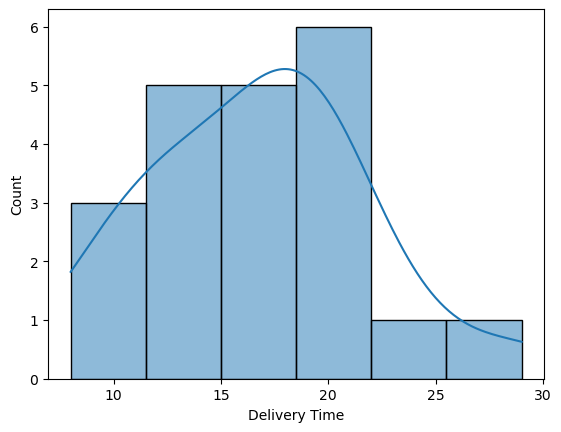

In [12]:
sns.histplot(x = 'Delivery Time', data = delivery_data, kde=True)

In [13]:
import scipy.stats as stats
skewness = stats.skew(delivery_data['Delivery Time'])
print(f'Skewness of Delivery Time data is {round(skewness,2)}')

Skewness of Delivery Time data is 0.33


In [14]:
#The graph shows it is right skewed

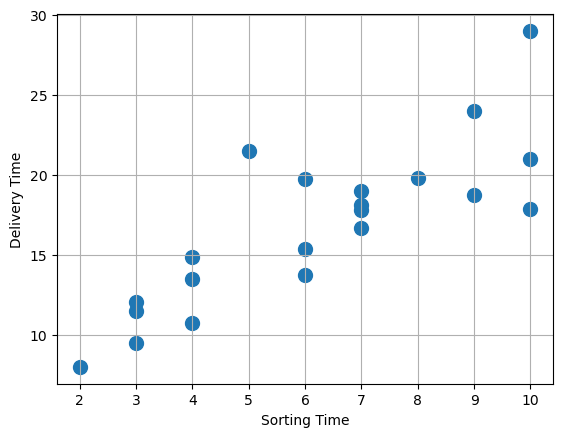

In [15]:
delivery_data.plot(x="Sorting Time",y="Delivery Time",kind="scatter",s=100,grid=True)
plt.savefig("Delivery_scatter.png",dpi=100)

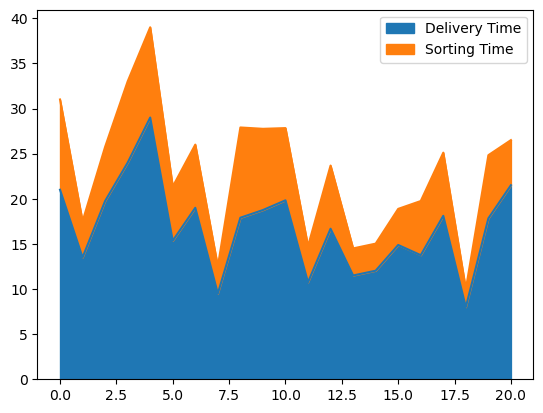

In [16]:
delivery_data[["Delivery Time","Sorting Time"]].plot(kind='area',legend=True)
plt.savefig("Delivery_area.png",dpi=100)

In [17]:
# This area graph shows that Sorting time is greater than Delivery time.
# The Delivery time pattern and the Sorting time pattern are almost the same.

<Axes: xlabel='Delivery Time'>

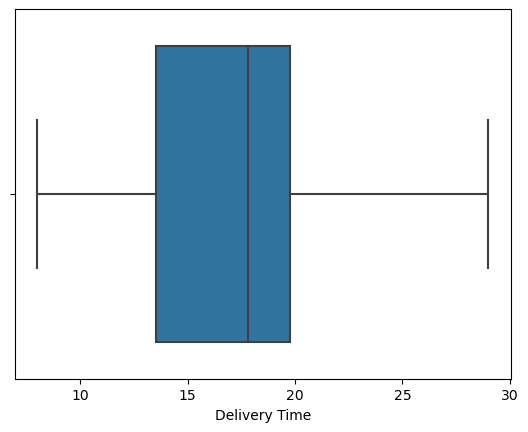

In [18]:
sns.boxplot(x = 'Delivery Time', data= delivery_data)

In [19]:
#There are no outliners in the data

# Simple Linear Regrression

### Objective - To predict Delivery Time using Sorting Time

In [20]:
# Here we have X=Sorting Time or Independent Variable
# and y as Delivery Time or Dependent Variable or Target Variable 

## Splitting the train_test_split as 80:20

In [21]:
y=delivery_data[['Delivery Time']]
y.head(3)

,Delivery Time
0,21.00
1,13.50
2,19.75


In [22]:
X=delivery_data[['Sorting Time']]
X.head(3)

,Sorting Time
0,10
1,4
2,6


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=2)

In [24]:
X_train.head(3)

,Sorting Time
9,9
12,7
18,2


In [25]:
y_train.head(3)

,Delivery Time
9,18.75
12,16.68
18,8.00


### Training the Model

In [26]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
print(model)

LinearRegression()


In [27]:
train_model=model.fit(X_train,y_train)
print(train_model)

LinearRegression()


In [28]:
pred=train_model.predict(X_test)
pred

array([[19.67145819],
       [18.01450587],
       [22.98536282],
       [11.38669661],
       [21.3284105 ]])

In [29]:
y_test

,Delivery Time
10,19.83
6,19.00
0,21.00
14,12.03
3,24.00


In [30]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is 0.8401


In [31]:
intercept = train_model.intercept_
slope = train_model.coef_
print('Intercept:',intercept)
print("Slope:",slope)

Intercept: [6.41583967]
Slope: [[1.65695232]]


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,y_test))
print(f'The RMSE of this model is {round(rmse,4)}')

The RMSE of this model is 1.5805


# Splitting the train_test_model as 75:25

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import sqrt

In [34]:
y=delivery_data[['Delivery Time']]
y.head(3)

,Delivery Time
0,21.00
1,13.50
2,19.75


In [35]:
X=delivery_data[['Sorting Time']]
X.head(3)

,Sorting Time
0,10
1,4
2,6


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=9)

In [ ]:
X_train.head(3),y_train.head(3)


In [37]:
model= LinearRegression()
print(model)

LinearRegression()


In [38]:
train_model=model.fit(X_train,y_train)
print(train_model)

LinearRegression()


In [39]:
pred=train_model.predict(X_test)
pred

array([[20.96986842],
       [19.84210526],
       [16.45881579],
       [19.84210526],
       [13.07552632],
       [11.94776316]])

In [40]:
y_test

,Delivery Time
4,29.00
9,18.75
5,15.35
3,24.00
7,9.50
18,8.00


In [42]:
r2=r2_score(y_test,pred)
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is 0.6639


In [48]:
intercept = train_model.intercept_
slope = train_model.coef_
print('Intercept:',intercept)
print("Slope:",slope)

Intercept: [9.69223684]
Slope: [[1.12776316]]


In [49]:
rmse = sqrt(mean_squared_error(pred,y_test))
print(f'The RMSE of this model is {round(rmse,4)}')

The RMSE of this model is 4.3313


# Splitting the train_test_model as 70:30

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import sqrt

In [51]:
y=delivery_data[['Delivery Time']]
y.head(3)

,Delivery Time
0,21.00
1,13.50
2,19.75


In [52]:
X=delivery_data[['Sorting Time']]
X.head(3)

,Sorting Time
0,10
1,4
2,6


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=15)

In [54]:
X_train.head(3),y_train.head(3)

(    Sorting Time
 14             3
 15             4
 4             10,
     Delivery Time
 14          12.03
 15          14.88
 4           29.00)

In [55]:
model= LinearRegression()
print(model)

LinearRegression()


In [56]:
train_model=model.fit(X_train,y_train)
print(train_model)

LinearRegression()


In [57]:
pred=train_model.predict(X_test)
pred

array([[19.22712601],
       [10.65302874],
       [15.7974871 ],
       [17.51230656],
       [14.08266765],
       [20.94194547],
       [20.94194547]])

In [59]:
y_test

,Delivery Time
10,19.83
13,11.50
2,19.75
19,17.83
20,21.50
9,18.75
3,24.00


In [60]:
r2=r2_score(y_test,pred)
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is 0.0466


In [61]:
intercept = train_model.intercept_
slope = train_model.coef_
print('Intercept:',intercept)
print("Slope:",slope)

Intercept: [5.50857038]
Slope: [[1.71481945]]


In [62]:
rmse = sqrt(mean_squared_error(pred,y_test))
print(f'The RMSE of this model is {round(rmse,4)}')

The RMSE of this model is 3.5046
